# Demo notebook to start working on the GBM Hackathon data
This notebook demonstrates how the MOSAIC ([Owkin](https://www.mosaic-research.com/)) and BRUCE ([PICI](https://www.parkerici.org/)) data can be loaded.

## Setup

In [1]:
# Load packages and classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tiffslide
import seaborn as sns
import gget
import tifffile
import zarr

# MosaicDataset and BruceDataset classes allow loading and visualisation of the different data sources
from gbmhackathon import MosaicDataset, BruceDataset

## Start exploring the MOSAIC data

In [2]:
# Look at the available data sources
MosaicDataset.sources.keys()

dict_keys(['clinical', 'bulk_rna', 'spatial', 'sc_rna', 'wes', 'he'])

In [3]:
# The following cell will returns a dictionary with the data sources in the
# keys and the list of files (and path) used to return the data.
source_dict_mosaic = MosaicDataset.load_tabular()

### Load the MOSAIC sample table
Not every data modality is available for each MOSAIC sample. The following table provides information on which modality is available for each sample.

In [4]:
filename_sample_table = "/home/ec2-user/SageMaker/data/mosaic_dataset/Data availibility per modality per patient.csv"
sample_table = pd.read_csv(filename_sample_table, index_col=0)
sample_table.head(2)

,Visium_usable,WES_usable,scRNAseq_usable,bulkRNAseq_usable,HE_usable,Clinical_usable
Hackathon_ID,,,,,,
HK_G_001a,Yes,Yes,Yes,Yes,Yes,Yes
HK_G_002a,Yes,Yes,Yes,Yes,Yes,Yes


### Load and explore the six MOSAIC data modalities

#### 1. Clinical data

In [5]:
# To access the clinical data, specify the correct keys
clin_df = source_dict_mosaic["clinical"]["processed gbm clinical"]
clin_df.head(2)

,patient_id,cohort_code,cancer_indication,sample_source,sample_origin,sample_collection_chronology,administrative_gender,smoking_status,smoking_quantity_pack_years,alcohol_intake,...,idh1_r132h_expression_ihc,tert_promoter_mutation,mgmt_promoter_methylation,egfr_mutation,egfr_amplification,pten_mutation,ntrk_fusion,histone_h3_g34_mutation_sequencing,histone_h3_k27m_mutation_sequencing,time_interval_sample_harvest_dearchival_years
sample_id,,,,,,,,,,,,,,,,,,,,,
HK_G_001a,HK_G_001,HK_GBM_#1,G: Glioblastoma,Surgical specimen,Primary tumour,Baseline,Male,NaN,NaN,NaN,...,Negative,NaN,Methylated,NaN,NaN,NaN,NaN,NaN,NaN,8.251882
HK_G_002a,HK_G_002,HK_GBM_#1,G: Glioblastoma,Surgical specimen,Primary tumour,Baseline,Male,Former smoker,14.0,Non drinker,...,Negative,NaN,Unmethylated,NaN,NaN,NaN,NaN,NaN,NaN,7.641342


In [25]:
clin_df.columns.unique()

Index(['patient_id', 'cohort_code', 'cancer_indication', 'sample_source',
       'sample_origin', 'sample_collection_chronology',
       'administrative_gender', 'smoking_status',
       'smoking_quantity_pack_years', 'alcohol_intake', 'os_years',
       'os_censor', 'pfs_years', 'pfs_censor', 'age_at_diagnosis_years',
       'primary_tumour_side', 'number_of_brain_tumour_sites',
       'largest_diameter_of_the_primary_tumour_mm_duplicated_0',
       'surgery_type', 'tumour_resection_chronology',
       'microvascular_proliferation', 'necrosis', 'presence_of_small_cells',
       'atrx_loss_of_expression_ihc', 'atrx_mutation', 'braf_mutation', 'gfap',
       'olig2', 'p53', 'idh1_idh2_mutation', 'idh1_r132h_expression_ihc',
       'tert_promoter_mutation', 'mgmt_promoter_methylation', 'egfr_mutation',
       'egfr_amplification', 'pten_mutation', 'ntrk_fusion',
       'histone_h3_g34_mutation_sequencing',
       'histone_h3_k27m_mutation_sequencing',
       'time_interval_sample_harvest

/tmp/ipykernel_1476/666675201.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions.values, ax=axes[i], palette="viridis")
/tmp/ipykernel_1476/666675201.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions.values, ax=axes[i], palette="viridis")
/tmp/ipykernel_1476/666675201.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions.values, ax=axes[i], palette="viridis")


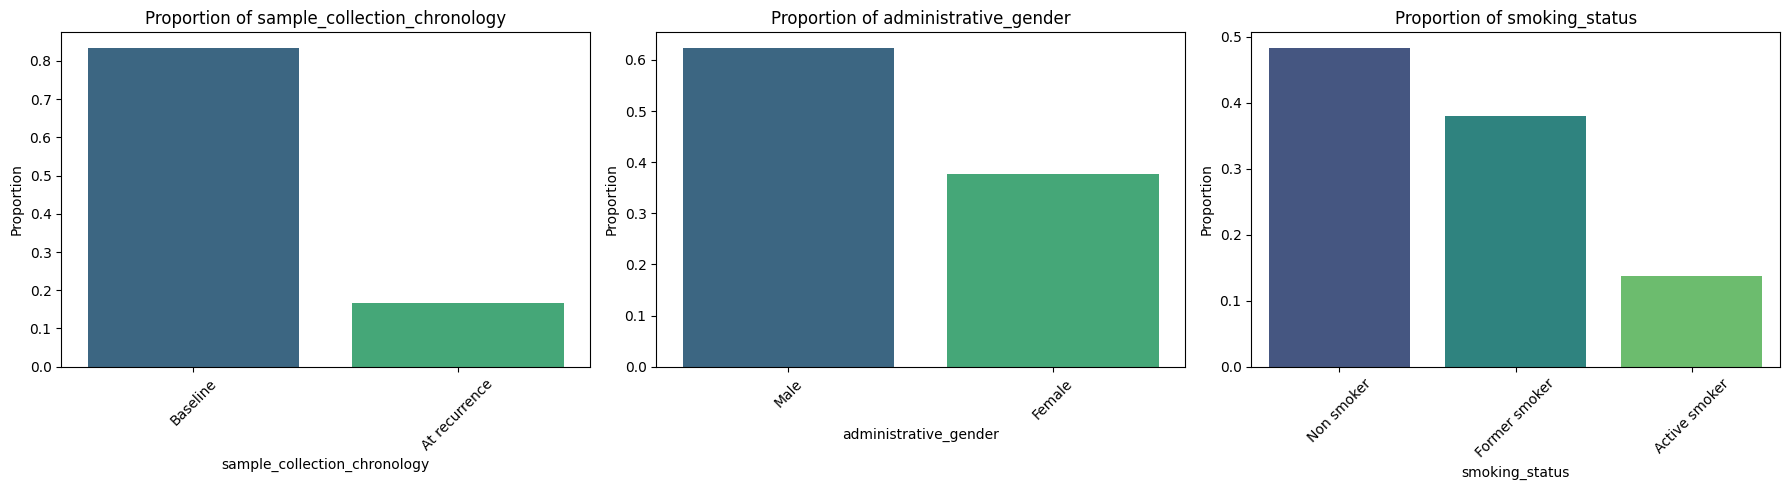

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categorical columns
categories = ["sample_collection_chronology", "administrative_gender", "smoking_status"]

# Set the figure size
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop through each category and plot its proportion
for i, category in enumerate(categories):
    proportions = clin_df[category].value_counts(normalize=True)  # Compute proportions
    sns.barplot(x=proportions.index, y=proportions.values, ax=axes[i], palette="viridis")
    
    axes[i].set_title(f"Proportion of {category}")
    axes[i].set_ylabel("Proportion")
    axes[i].set_xlabel(category)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [26]:
grouped_duplicates = clin_df.groupby(['os_years', 'pfs_years']).filter(lambda x: len(x) > 1)
grouped_duplicates


,patient_id,cohort_code,cancer_indication,sample_source,sample_origin,sample_collection_chronology,administrative_gender,smoking_status,smoking_quantity_pack_years,alcohol_intake,...,idh1_r132h_expression_ihc,tert_promoter_mutation,mgmt_promoter_methylation,egfr_mutation,egfr_amplification,pten_mutation,ntrk_fusion,histone_h3_g34_mutation_sequencing,histone_h3_k27m_mutation_sequencing,time_interval_sample_harvest_dearchival_years
sample_id,,,,,,,,,,,,,,,,,,,,,
HK_G_016a,HK_G_016,HK_GBM_#1,G: Glioblastoma,Biopsy,Primary tumour,Baseline,Male,Former smoker,NaN,NaN,...,Negative,No,Unmethylated,No,No,No,No,No,No,6.869268
HK_G_017b,HK_G_017,HK_GBM_#1,G: Glioblastoma,Surgical specimen,Primary tumour,At recurrence,Male,Former smoker,NaN,NaN,...,Negative,No,Unmethylated,No,No,No,No,No,No,6.017796
HK_G_028a,HK_G_028,HK_GBM_#1,G: Glioblastoma,Surgical specimen,Primary tumour,Baseline,Male,NaN,NaN,NaN,...,Negative,No,Methylated,No,No,No,No,No,No,6.951403
HK_G_029b,HK_G_029,HK_GBM_#1,G: Glioblastoma,Surgical specimen,Primary tumour,At recurrence,Male,NaN,NaN,NaN,...,Negative,No,Methylated,No,No,No,No,No,No,2.973306
HK_G_035a,HK_G_035,HK_GBM_#1,G: Glioblastoma,Surgical specimen,Primary tumour,Baseline,Male,NaN,NaN,NaN,...,Negative,Yes,Unmethylated,NaN,Yes,NaN,NaN,NaN,NaN,3.594798
HK_G_036b,HK_G_036,HK_GBM_#1,G: Glioblastoma,Surgical specimen,Primary tumour,At recurrence,Male,NaN,NaN,NaN,...,Negative,Yes,Unmethylated,NaN,Yes,NaN,NaN,NaN,NaN,2.754278
HK_G_043a,HK_G_043,HK_GBM_#1,G: Glioblastoma,Surgical specimen,Primary tumour,Baseline,Female,NaN,NaN,NaN,...,Negative,NaN,Methylated,NaN,NaN,NaN,NaN,NaN,NaN,4.991102
HK_G_044b,HK_G_044,HK_GBM_#1,G: Glioblastoma,Surgical specimen,Primary tumour,At recurrence,Female,NaN,NaN,NaN,...,Negative,NaN,Methylated,NaN,NaN,NaN,NaN,NaN,NaN,4.824093
HK_G_058a,HK_G_058,HK_GBM_#1,G: Glioblastoma,Surgical specimen,Primary tumour,Baseline,Female,NaN,NaN,NaN,...,Negative,NaN,Methylated,NaN,NaN,NaN,NaN,NaN,NaN,11.096509


In [18]:
from itertools import combinations
import pandas as pd

# Step 1: Select duplicates
duplicate_rows = clin_df[clin_df.duplicated(subset=['os_censor', 'os_years', 'pfs_years'], keep=False)]

# Step 2: Define columns to compare (excluding ones already used for filtering)
columns_to_compare = [col for col in clin_df.columns if col not in ['os_censor', 'os_years', 'pfs_years']]

# Step 3: Compute similarity for each pair
pairs = []
for idx1, idx2 in combinations(duplicate_rows.index, 2):  # Generate all possible pairs
    row1, row2 = duplicate_rows.loc[idx1], duplicate_rows.loc[idx2]
    
    # Count how many columns have the same values (excluding NaNs)
    similarity_score = sum(row1[col] == row2[col] for col in columns_to_compare if pd.notna(row1[col]) and pd.notna(row2[col]))
    
    pairs.append((idx1, idx2, similarity_score))

# Step 4: Sort pairs by highest similarity
pairs_sorted = sorted(pairs, key=lambda x: x[2], reverse=True)

# Step 5: Assign couples while ensuring uniqueness
assigned = set()
couples = []
for idx1, idx2, score in pairs_sorted:
    if idx1 not in assigned and idx2 not in assigned:  # Ensure unique pairing
        couples.append((idx1, idx2))
        assigned.update([idx1, idx2])

# Convert to DataFrame for readability
couples_df = pd.DataFrame(couples, columns=['Sample1', 'Sample2'])
print(couples_df)


      Sample1    Sample2
0   HK_G_016a  HK_G_017b
1   HK_G_028a  HK_G_029b
2   HK_G_035a  HK_G_036b
3   HK_G_095a  HK_G_096b
4   HK_G_089a  HK_G_090b
5   HK_G_091a  HK_G_092b
6   HK_G_043a  HK_G_044b
7   HK_G_078a  HK_G_079b
8   HK_G_081a  HK_G_082b
9   HK_G_083a  HK_G_084b
10  HK_G_108a  HK_G_109b
11  HK_G_112a  HK_G_113b
12  HK_G_060a  HK_G_061b
13  HK_G_099a  HK_G_100b
14  HK_G_110a  HK_G_111b
15  HK_G_085a  HK_G_086b
16  HK_G_104a  HK_G_105b
17  HK_G_114a  HK_G_115b
18  HK_G_058a  HK_G_059b


In [29]:
import pandas as pd
from itertools import combinations

# Step 1: Select duplicates (samples with the same os_censor, os_years, pfs_years)
duplicate_rows = clin_df[clin_df.duplicated(subset=['os_censor', 'os_years', 'pfs_years'], keep=False)]

# Step 2: Define columns to compare (excluding the ones already used for filtering)
columns_to_compare = [col for col in clin_df.columns if col not in ['os_censor', 'os_years', 'pfs_years']]

# Step 3: Compute similarity for each pair (comparing values in the columns)
pairs = []
for idx1, idx2 in combinations(duplicate_rows.index, 2):  # Generate all possible pairs
    row1, row2 = duplicate_rows.loc[idx1], duplicate_rows.loc[idx2]
    
    # Count how many columns have the same values (excluding NaNs)
    similarity_score = sum(row1[col] == row2[col] for col in columns_to_compare if pd.notna(row1[col]) and pd.notna(row2[col]))
    
    pairs.append((idx1, idx2, similarity_score))

# Step 4: Sort pairs by highest similarity score
pairs_sorted = sorted(pairs, key=lambda x: x[2], reverse=True)

# Step 5: Assign couples while ensuring uniqueness and giving them labels
assigned = set()
couples = []
couple_label = 'A'  # Start with label 'A'
for idx1, idx2, score in pairs_sorted:
    if idx1 not in assigned and idx2 not in assigned:  # Ensure unique pairing
        couples.append((idx1, idx2, couple_label))
        assigned.update([idx1, idx2])
        couple_label = chr(ord(couple_label) + 1)  # Move to the next letter

# Step 6: Create a dictionary to map sample indices to their couple labels
couple_dict = {}
for idx1, idx2, label in couples:
    couple_dict[idx1] = label
    couple_dict[idx2] = label

# Step 7: Add a new column 'couple' in clin_df with the couple labels
clin_df['couple'] = clin_df.index.map(couple_dict)

# For samples not in a couple, the 'couple' column will be NaN
# Leave the non-couple samples with no label (NaN)

# Check the result (show first few rows)
print(clin_df.head())


          patient_id cohort_code cancer_indication      sample_source  \
sample_id                                                               
HK_G_001a   HK_G_001   HK_GBM_#1   G: Glioblastoma  Surgical specimen   
HK_G_002a   HK_G_002   HK_GBM_#1   G: Glioblastoma  Surgical specimen   
HK_G_003a   HK_G_003   HK_GBM_#1   G: Glioblastoma  Surgical specimen   
HK_G_004a   HK_G_004   HK_GBM_#1   G: Glioblastoma  Surgical specimen   
HK_G_005a   HK_G_005   HK_GBM_#1   G: Glioblastoma  Surgical specimen   

            sample_origin sample_collection_chronology administrative_gender  \
sample_id                                                                      
HK_G_001a  Primary tumour                     Baseline                  Male   
HK_G_002a  Primary tumour                     Baseline                  Male   
HK_G_003a  Primary tumour                     Baseline                Female   
HK_G_004a  Primary tumour                     Baseline                Female   
HK_G_005

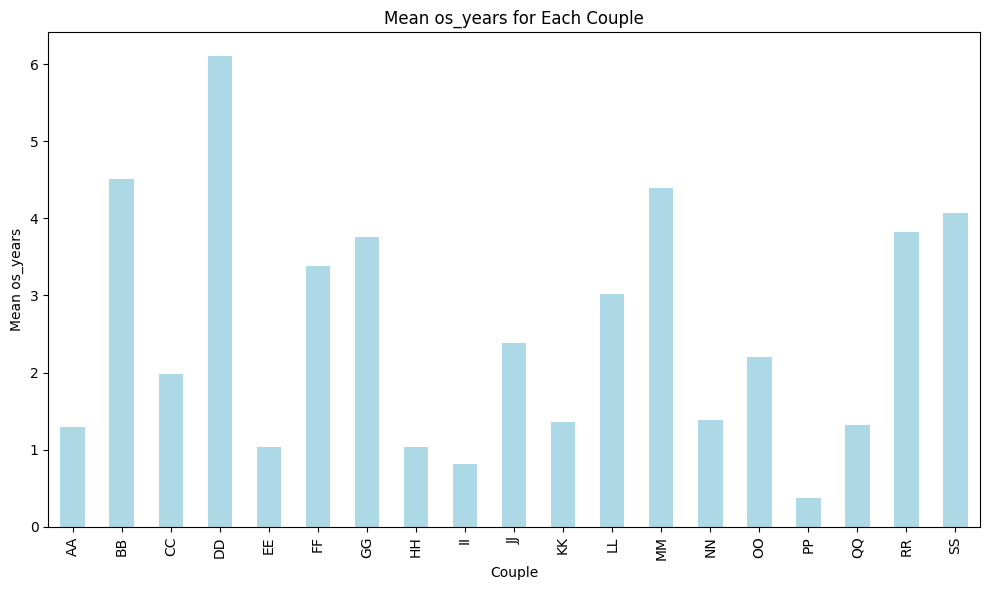

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group by 'couple' and aggregate the selected columns
grouped = duplicate_rows.groupby('couple')[["sample_collection_chronology", 
                                            "administrative_gender", 
                                            "smoking_status", 
                                            "mgmt_promoter_methylation"]].apply(lambda x: x.mode().iloc[0])

# Step 2: Calculate the proportions for each couple across the selected columns
# Proportion for categorical variables (we will count proportions for each category per column)
proportions = duplicate_rows.groupby('couple')[["sample_collection_chronology", 
                                                "administrative_gender", 
                                                "smoking_status", 
                                                "mgmt_promoter_methylation"]].apply(lambda x: x.apply(lambda y: y.value_counts(normalize=True)))



# Step 4: Plot the mean os_years for each couple
mean_os_years = duplicate_rows.groupby('couple')['os_years'].mean()

# Plotting mean os_years
fig, ax = plt.subplots(figsize=(10, 6))
mean_os_years.plot(kind='bar', ax=ax, color='lightblue')

# Labels and title for os_years plot
ax.set_xlabel('Couple')
ax.set_ylabel('Mean os_years')
ax.set_title('Mean os_years for Each Couple')

# Show the plot
plt.tight_layout()
plt.show()


In [31]:
import numpy as np

# Step 1: Identify the samples tagged with 'couple' and the rest of the samples in the DataFrame
# Assuming 'couple' column is already added to the DataFrame (e.g., in the `duplicate_rows` DataFrame)

# Samples tagged as couples (those with a non-null value in 'couple')
couple_samples = clin_df[clin_df['couple'].notnull()]

# Samples not tagged as couples (those with a null value in 'couple')
non_couple_samples = clin_df[clin_df['couple'].isnull()]

# Step 2: Compute the mean for the samples tagged as couples (we'll compute the mean and variance of 'os_years' for example)
mean_couple = couple_samples['os_years'].mean() if not couple_samples.empty else np.nan
variance_couple = couple_samples['os_years'].var() if not couple_samples.empty else np.nan

# Step 3: Compute the mean and variance for the other samples (non-couples)
mean_non_couple = non_couple_samples['os_years'].mean() if not non_couple_samples.empty else np.nan
variance_non_couple = non_couple_samples['os_years'].var() if not non_couple_samples.empty else np.nan

# Step 4: Print the results
print(f"Mean os_years for samples tagged as couples: {mean_couple:.2f}")
print(f"Variance os_years for samples tagged as couples: {variance_couple:.2f}")
print(f"Mean os_years for non-couple samples: {mean_non_couple:.2f}")
print(f"Variance os_years for non-couple samples: {variance_non_couple:.2f}")


Mean os_years for samples tagged as couples: 2.54
Variance os_years for samples tagged as couples: 2.42
Mean os_years for non-couple samples: 1.43
Variance os_years for non-couple samples: 1.27


In [12]:
# For the clinical data, you also have access to a dictionary to understand the
# variable's name
data_dict = source_dict_mosaic["clinical"]["data dictionary"]
data_dict.head(3)

,File name,Field name,Note
0,sample_and_clinical_data,sample_id,Unique identifier for each biological sample c...
1,sample_and_clinical_data,patient_id,Unique identifier assigned to each patient in ...
2,sample_and_clinical_data,cohort_code,Code representing the cohort to which the pati...


#### 2. Bulk RNA sequencing data

In [8]:
# To access the bulk RNAseq data, you can specify a particular normalization
print(source_dict_mosaic["bulk_rna"].keys())
bRNA_TPM = source_dict_mosaic["bulk_rna"]["TPM counts"]
bRNA_TPM.head(2)

dict_keys(['raw counts', 'TPM counts', 'normalized counts', 'fpkm counts'])


,HK_G_001a_mRNA,HK_G_002a_mRNA,HK_G_003a_mRNA,HK_G_004a_mRNA,HK_G_005a_mRNA,HK_G_006a_mRNA,HK_G_007a_mRNA,HK_G_008a_mRNA,HK_G_009a_mRNA,HK_G_010a_mRNA,...,HK_G_104a_mRNA,HK_G_106a_mRNA,HK_G_108a_mRNA,HK_G_109b_mRNA,HK_G_110a_mRNA,HK_G_111b_mRNA,HK_G_112a_mRNA,HK_G_113b_mRNA,HK_G_114a_mRNA,HK_G_115b_mRNA
EnsemblID,,,,,,,,,,,,,,,,,,,,,
ENSG00000227232,2.646295,4.818720,4.988052,10.826797,10.334242,6.164277,1.861153,7.040015,10.019317,6.855820,...,2.54642,0.0,1.766217,0.073299,1.147692,1.985879,1.614058,0.000000,0.685128,2.793477
ENSG00000278267,13.143915,55.589013,36.336981,10.082953,82.126826,4.223092,6.162789,61.345849,26.106263,47.673153,...,14.45468,0.0,3.341960,20.387991,13.681160,3.034980,32.067527,22.379758,3.402972,60.785522


In [9]:
# A quick way to convert ensemblID to gene names, using gget, but other tools exist
# ensembl_ids = bRNA_TPM.index.astype(str).tolist()[:10]
# result = gget.info(ensembl_ids, verbose=False)
# result["ensembl_gene_name"]

#### 3. Whole exome sequencing (WES) data

The single nucleotide variant (SNV) and small insertion and deletion (indel) information are stored in a DataFrame, with rows representing samples and columns representing genes. Each cell contains a Boolean value (True/False) indicating whether a gene contains a potentially oncogenic SNV or indel in that sample.

A gene is considered to have a potentially oncogenic alteration if it meets one of these criteria:
- The variant creates a nonsense mutation in a known tumour suppressor gene (TSG)
- The variant results in a previously documented amino acid change at a known cancer hotspot

Note that the TSGs and hotspots used in this analysis are not specific to GBM. To focus specifically on likely GBM drivers, you may want to use a more restricted gene list.

WES was performed on tumour samples only and we are therefore not always able to distinguish between somatic and germline variants. Some genes, such as HLA genes, likely contain false positives.

In [10]:
# Access SNVs and indels
snvs_indels = source_dict_mosaic["wes"]["WES mutations"]
snvs_indels.head(2)

gene_name,CREBBP,CD79B,BTK,BRCA1,FAS,POU2F2,ANK1,CUL3,FLT4,TLL1,...,DDX3X,LTB,HLA-B,CEBPA,LYN,CUX1,TAF15,KMT2B,ZNF658,H3C2
sample_id,,,,,,,,,,,,,,,,,,,,,
HK_G_001a,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
HK_G_002a,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [17]:
from itertools import combinations
import pandas as pd

# Step 1: Select duplicates
duplicate_rows = clin_df[clin_df.duplicated(subset=['os_censor', 'os_years', 'pfs_years'], keep=False)]

# Step 2: Define columns to compare (excluding ones already used for filtering)
columns_to_compare = [col for col in clin_df.columns if col not in ['os_censor', 'os_years', 'pfs_years']]

# Step 3: Compute similarity for each pair
pairs = []
for idx1, idx2 in combinations(duplicate_rows.index, 2):  # Generate all possible pairs
    row1, row2 = duplicate_rows.loc[idx1], duplicate_rows.loc[idx2]
    
    # Count how many columns have the same values (excluding NaNs)
    similarity_score = sum(row1[col] == row2[col] for col in columns_to_compare if pd.notna(row1[col]) and pd.notna(row2[col]))
    
    pairs.append((idx1, idx2, similarity_score))

# Step 4: Sort pairs by highest similarity
pairs_sorted = sorted(pairs, key=lambda x: x[2], reverse=True)

# Step 5: Assign couples while ensuring uniqueness
assigned = set()
couples = []
for idx1, idx2, score in pairs_sorted:
    if idx1 not in assigned and idx2 not in assigned:  # Ensure unique pairing
        couples.append((idx1, idx2))
        assigned.update([idx1, idx2])

# Convert to DataFrame for readability
couples_df = pd.DataFrame(couples, columns=['Sample1', 'Sample2'])
print(couples_df)


      Sample1    Sample2
0   HK_G_016a  HK_G_017b
1   HK_G_028a  HK_G_029b
2   HK_G_035a  HK_G_036b
3   HK_G_095a  HK_G_096b
4   HK_G_089a  HK_G_090b
5   HK_G_091a  HK_G_092b
6   HK_G_043a  HK_G_044b
7   HK_G_078a  HK_G_079b
8   HK_G_081a  HK_G_082b
9   HK_G_083a  HK_G_084b
10  HK_G_108a  HK_G_109b
11  HK_G_112a  HK_G_113b
12  HK_G_060a  HK_G_061b
13  HK_G_099a  HK_G_100b
14  HK_G_110a  HK_G_111b
15  HK_G_085a  HK_G_086b
16  HK_G_104a  HK_G_105b
17  HK_G_114a  HK_G_115b
18  HK_G_058a  HK_G_059b


In [11]:
snvs_indels.sum().sort_values(ascending=False).head()

gene_name
HLA-B    71
TP53     35
PTEN     31
HLA-A    26
EGFR     25
dtype: int64

Copy number variant (CNV) information is stored across three distinct DataFrames:
- A binary matrix indicating which genes are affected by deletions in each sample
- A binary matrix indicating which genes are affected by amplifications in each sample
- A binary matrix indicating which genes are affected by potentially oncogenic CNVs in each sample

A gene is considered to be affected by a potentially oncogenic CNV if it meets either of these criteria:
- It is a known TSG and is affected by a deletion
- It is a known oncogene and is affected by a duplication

The lists of known TSGs and oncogenes are obtained from the IntOGen database. While TSGs and oncogenes can be cancer-specific, our analysis considers all TSGs and oncogenes identified in any cancer type, not just those specific to GBM.

In [12]:
# Access amplifications
CNVamp = source_dict_mosaic["wes"]["WES CNV amplification"]
CNVamp.head(2)

gene_name,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,CD99,SHOX,CSF2RA,GTPBP6,CRLF2,VAMP7,WASH6P,IL9R,DUSP13B,DUSP13A
sample_id,,,,,,,,,,,,,,,,,,,,,
HK_G_001a,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
HK_G_002a,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# You can also access the deletions
CNVdel = source_dict_mosaic["wes"]["WES CNV deletion"]
CNVdel.head(2)

gene_name,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,CD99,SHOX,CSF2RA,GTPBP6,CRLF2,VAMP7,WASH6P,IL9R,DUSP13B,DUSP13A
sample_id,,,,,,,,,,,,,,,,,,,,,
HK_G_001a,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
HK_G_002a,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
print("Number of samples with information on CNV alterations: ", CNVdel.shape[0])

Number of samples with information on CNV alterations:  107


In [15]:
# Show the top deleted genes
CNVdel.sum().sort_values(ascending=False).head()

gene_name
TBC1D3K    80
TBC1D3E    80
TBC1D3C    80
TBC1D3L    80
TBC1D3I    80
dtype: int64

In [16]:
# Access the potentially oncogenic CNVs and show the top genes
CNVoncogenic = source_dict_mosaic["wes"]["WES CNV oncogenic"]
CNVoncogenic.sum().sort_values(ascending=False).head()

gene_name
CDKN2A    80
GATA3     66
KLF6      37
KAT6B     27
CD274     17
dtype: int64

#### 4. Single-cell RNA sequencing (Chromium) data
Processed single-cell RNA sequencing data are stored as an AnnData object. Ambient RNA has been removed using [SoupX](https://academic.oup.com/gigascience/article/9/12/giaa151/6049831) and doublets identified and removed using [ScDblFinder](https://pmc.ncbi.nlm.nih.gov/articles/PMC9204188/).

In [13]:
# Note that it can take up to 12 minutes to load the single-cell data because it is heavy
single_cell_obj = MosaicDataset.load_singlecell()
# Display the content of the anndata object
single_cell_obj.__dict__.keys()

dict_keys(['_is_view', '_adata_ref', '_oidx', '_vidx', 'file', '_X', '_obs', '_var', '_uns', '_obsm', '_varm', '_obsp', '_varp', '_raw', '_layers'])

Various normalisations have been applied to the data. The unnormalised and normalised gene expression data can be accessed as follows.

In [14]:
# .layers["ambient_rna_removed"] contains the unnormalised counts
single_cell_obj.layers["ambient_rna_removed"]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1132239414 stored elements and shape (620451, 17842)>

In [15]:
# .layers["LogNormalize"] contains log-normalised counts
single_cell_obj.layers["LogNormalize"]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1132239414 stored elements and shape (620451, 17842)>

In [16]:
# .X contains the log of the SCTransform-corrected counts plus one
single_cell_obj.X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 848560087 stored elements and shape (620451, 17842)>

In [32]:
single_cell_obj.obs

,orig.ident,percent_reads_mt,percent_reads_ribo,percent_reads_hb,doublet_score_scdblfinder,doublet_predicted_scdblfinder,seurat_clusters,seurat_clusters_res_0.1,seurat_clusters_res_0.2,seurat_clusters_res_0.4,...,celltype_level4_scanvi,celltype_level_custom1_scanvi,SCT_snn_res.0.4,SCT_snn_res.2,seurat_clusters_heterogeneity,seurat_clusters_res_1.5,seurat_clusters_res_2.5,seurat_clusters_res_3,seurat_clusters_res_3.5,seurat_clusters_res_4
HK_G_058a.AAACAAGCACGGGCTAACTTTAGG-1,HK_G_058a,0.699828,0.0,0.000000,0.237310,0,4,0,0,2,...,Tu_HK_G_058a_c03,Tu_HK_G_058a_c03,3,34,3,29,6,2,12,41
HK_G_058a.AAACAAGCACTTTATGACTTTAGG-1,HK_G_058a,0.666423,0.0,0.000000,0.062168,0,3,0,0,1,...,Tu_HK_G_058a_c03,Tu_HK_G_058a_c03,3,23,3,29,52,59,12,28
HK_G_058a.AAACAAGCATGGATTGACTTTAGG-1,HK_G_058a,1.512503,0.0,0.000000,0.111736,0,13,0,0,1,...,Tu_HK_G_058a_nos,Tu_HK_G_058a_nos,2,5,2,12,2,20,33,21
HK_G_058a.AAACAAGCATGGCGCAACTTTAGG-1,HK_G_058a,0.830882,0.0,0.000000,0.031941,0,39,0,0,2,...,Tu_HK_G_058a_c02,Tu_HK_G_058a_c02,1,33,1,9,37,49,47,45
HK_G_058a.AAACCAATCAAGGTCGACTTTAGG-1,HK_G_058a,1.704164,0.0,0.000000,0.074852,0,25,2,1,13,...,Monocyte_nos,MoMac,2,18,2,27,18,16,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HK_G_057a.TTTGTGAGTCACCAGCATTCGGTT-1,HK_G_057a,4.213188,0.0,0.000000,0.001372,0,26,1,3,5,...,Tu_HK_G_057a_c05,Tu_HK_G_057a_c05,5,19,5,11,8,19,16,12
HK_G_057a.TTTGTGAGTCACGATTATTCGGTT-1,HK_G_057a,2.471638,0.0,0.000000,0.015304,0,7,2,1,0,...,Tu_HK_G_057a_nos,Tu_HK_G_057a_nos,3,66,3,4,5,4,3,18
HK_G_057a.TTTGTGAGTGATTAGGATTCGGTT-1,HK_G_057a,0.280458,0.0,0.185809,0.073202,0,13,0,0,1,...,Tu_HK_G_057a_c06,Tu_HK_G_057a_c06,6,5,6,12,2,20,33,21
HK_G_057a.TTTGTGAGTGTCCAGCATTCGGTT-1,HK_G_057a,5.174891,0.0,0.182676,0.057404,0,13,0,0,2,...,Tu_HK_G_057a_c02,Tu_HK_G_057a_c02,1,5,1,12,2,20,33,21


In [34]:
# Define the pairs of 'orig.ident' you want to select
selected_identifiers = [
    'HK_G_016a', 'HK_G_017b',
    'HK_G_028a', 'HK_G_029b',
    'HK_G_035a', 'HK_G_036b',
    'HK_G_095a', 'HK_G_096b',
    'HK_G_089a', 'HK_G_090b',
    'HK_G_091a', 'HK_G_092b',
    'HK_G_043a', 'HK_G_044b',
    'HK_G_078a', 'HK_G_079b',
    'HK_G_081a', 'HK_G_082b',
    'HK_G_083a', 'HK_G_084b',
    'HK_G_108a', 'HK_G_109b',
    'HK_G_112a', 'HK_G_113b',
    'HK_G_060a', 'HK_G_061b',
    'HK_G_099a', 'HK_G_100b',
    'HK_G_110a', 'HK_G_111b',
    'HK_G_085a', 'HK_G_086b',
    'HK_G_104a', 'HK_G_105b',
    'HK_G_114a', 'HK_G_115b',
    'HK_G_058a', 'HK_G_059b'
]

# Filter the AnnData object to only include the cells with the selected 'orig.ident' values
selected_cells = single_cell_obj[single_cell_obj.obs['orig.ident'].isin(selected_identifiers)].copy()

# Display the shape of the filtered data to verify the selection
print(f"Selected cells shape: {selected_cells.shape}")


Selected cells shape: (175476, 17842)


In [44]:
# Add the 'recurrence' column to selected_cells by directly using the index from clin_df
selected_cells.obs['recurrence'] = selected_cells.obs['orig.ident'].map(clin_df['sample_collection_chronology'])

# Verify that the new column has been added
print(selected_cells.obs[['orig.ident', 'recurrence']].head())

                                     orig.ident recurrence
HK_G_058a.AAACAAGCACGGGCTAACTTTAGG-1  HK_G_058a   Baseline
HK_G_058a.AAACAAGCACTTTATGACTTTAGG-1  HK_G_058a   Baseline
HK_G_058a.AAACAAGCATGGATTGACTTTAGG-1  HK_G_058a   Baseline
HK_G_058a.AAACAAGCATGGCGCAACTTTAGG-1  HK_G_058a   Baseline
HK_G_058a.AAACCAATCAAGGTCGACTTTAGG-1  HK_G_058a   Baseline


In [52]:
# Add the 'couple' column to selected_cells by directly using the index from clin_df
selected_cells.obs['couple'] = selected_cells.obs['orig.ident'].map(clin_df['couple'])

# Verify that the new column has been added
print(selected_cells.obs[['orig.ident', 'couple']].head())


                                     orig.ident couple
HK_G_058a.AAACAAGCACGGGCTAACTTTAGG-1  HK_G_058a      S
HK_G_058a.AAACAAGCACTTTATGACTTTAGG-1  HK_G_058a      S
HK_G_058a.AAACAAGCATGGATTGACTTTAGG-1  HK_G_058a      S
HK_G_058a.AAACAAGCATGGCGCAACTTTAGG-1  HK_G_058a      S
HK_G_058a.AAACCAATCAAGGTCGACTTTAGG-1  HK_G_058a      S


In [41]:
selected_cells

AnnData object with n_obs × n_vars = 175476 × 17842
    obs: 'orig.ident', 'percent_reads_mt', 'percent_reads_ribo', 'percent_reads_hb', 'doublet_score_scdblfinder', 'doublet_predicted_scdblfinder', 'seurat_clusters', 'seurat_clusters_res_0.1', 'seurat_clusters_res_0.2', 'seurat_clusters_res_0.4', 'seurat_clusters_res_0.6', 'seurat_clusters_res_0.8', 'seurat_clusters_res_1', 'seurat_clusters_res_2', 'origin', '_scvi_batch', '_scvi_labels', 'scanvi_score', 'celltype_level1_scanvi', 'celltype_level2_scanvi', 'celltype_level3_scanvi', 'celltype_level4_scanvi', 'celltype_level_custom1_scanvi', 'SCT_snn_res.0.4', 'SCT_snn_res.2', 'seurat_clusters_heterogeneity', 'seurat_clusters_res_1.5', 'seurat_clusters_res_2.5', 'seurat_clusters_res_3', 'seurat_clusters_res_3.5', 'seurat_clusters_res_4', 'recurrence'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'celltype_annotation_reference', 'neighbors', 'scanvi_probs', 'umap', 'orig.ident_colors'
    obsm: 'X_pca', 'X_scanvi', 'X_scvi', 'X_umap'
    l

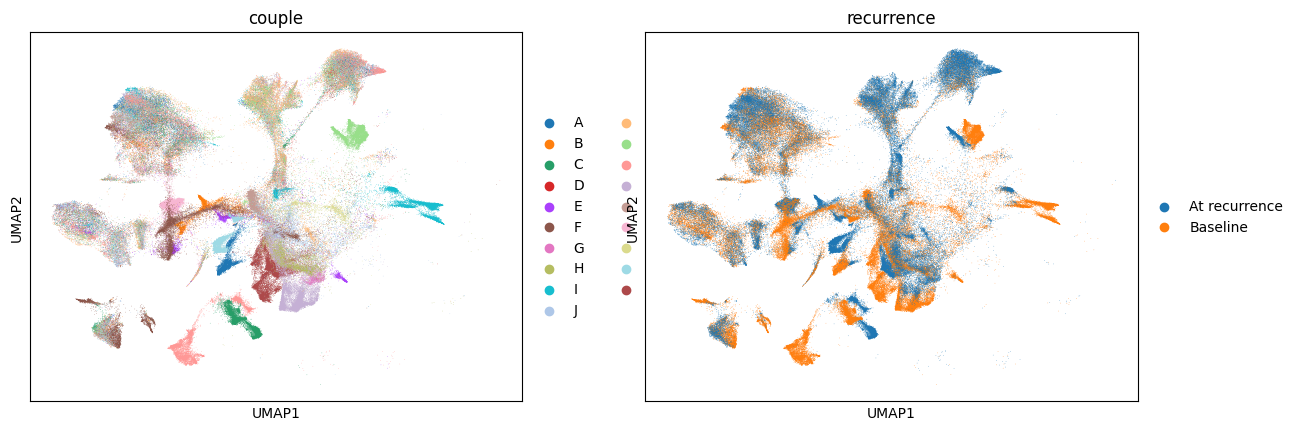

In [54]:
import scanpy as sc
sc.pl.umap(selected_cells, color = ['couple', 'recurrence'])

In [55]:
!pip install pertpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 22.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached protobuf-5.29.3-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached anndata-0.11.3-py3-none-any.whl.metadata (8.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 92.8 MB/s eta 0:00:00:00:010:01
Using cached rich-13.9.4-py3-none-any.whl (242 kB)
Using cached anndata-0.11.3-py3-none-any.whl (142 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 133.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.0/102.0 MB 107.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 133.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [ ]:
cf, ot, de = co.cinemaot.cinemaot_unweighted(selected_cells,obs_label='recurrence', ref_label='At recurrence', expr_label='Baseline',mode='parametric',thres=0.5,smoothness=1e-5,eps=1e-3,preweight_label='couple')

In [ ]:
sc.pp.pca(de)
sc.pp.neighbors(de,use_rep='X_embedding')
sc.tl.leiden(de,resolution=0.2)
sc.tl.umap(de)
utils.assignleiden(de,'couple','leiden','typebatch')
sc.pl.umap(de,color=['typebatch','couple'],wspace=0.5)

The `.obs` property contains cell-level meta-data. Each row represents a cell. The most useful columns are:
- `orig.ident` The sample ID.
- `celltype_level1_scanvi` Level 1 cell type annotations. These are the annotations at the lowest resolution, and comprise the following five cell types: *Immune*, *Malignant*, *Neuroglia*, *Neuron*, *Stromal*.
- `celltype_level2_scanvi` Level 2 cell type annotations. These are higher resolution than level 1 annotations.
- `celltype_level3_scanvi` Level 3 cell type annotations. Malignant cells from each sample are annotated separately, for example, *Tu_HK_G_001* are malignant cells from sample *HK_G_001*.
- `celltype_level4_scanvi` Level 4 cell type annotations. These are the highest-resolution annotations. Malignant cells from each sample have been subclustered based on transcriptional similarity. For example, malignant cells from *Tu_HK_G_111b* have been subclustered into *Tu_HK_G_111b_c01*, *Tu_HK_G_111b_c02*, *Tu_HK_G_111b_c03*, and *Tu_HK_G_111b_nos*.

In [21]:
single_cell_obj.obs.head(2)

,orig.ident,percent_reads_mt,percent_reads_ribo,percent_reads_hb,doublet_score_scdblfinder,doublet_predicted_scdblfinder,seurat_clusters,seurat_clusters_res_0.1,seurat_clusters_res_0.2,seurat_clusters_res_0.4,...,celltype_level4_scanvi,celltype_level_custom1_scanvi,SCT_snn_res.0.4,SCT_snn_res.2,seurat_clusters_heterogeneity,seurat_clusters_res_1.5,seurat_clusters_res_2.5,seurat_clusters_res_3,seurat_clusters_res_3.5,seurat_clusters_res_4
HK_G_058a.AAACAAGCACGGGCTAACTTTAGG-1,HK_G_058a,0.699828,0.0,0.0,0.237310,0,4,0,0,2,...,Tu_HK_G_058a_c03,Tu_HK_G_058a_c03,3,34,3,29,6,2,12,41
HK_G_058a.AAACAAGCACTTTATGACTTTAGG-1,HK_G_058a,0.666423,0.0,0.0,0.062168,0,3,0,0,1,...,Tu_HK_G_058a_c03,Tu_HK_G_058a_c03,3,23,3,29,52,59,12,28


PCA and UMAP embedding have already been computed. These are stored in the `.obsm` property.

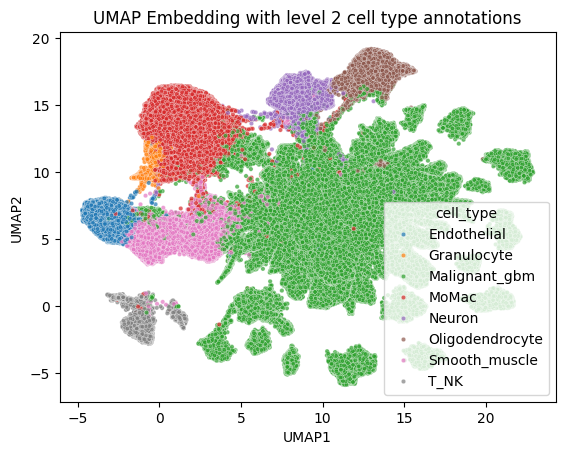

In [22]:
# Visualize single-cell UMAP coloured by level 2 cell type annotations
embedding = single_cell_obj.obsm["X_umap"][:, :2]
df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])
df["cell_type"] = single_cell_obj.obs["celltype_level2_scanvi"].values
sns.scatterplot(
    data=df,
    x="UMAP1",
    y="UMAP2",
    hue="cell_type",
    palette="tab10",
    s=10,
    alpha=0.7
)
plt.title("UMAP Embedding with level 2 cell type annotations")
plt.show()

#### 5. Spatial transcriptomic (Visium) data
The `notebooks/visium_starter_mosaic.ipynb` Notebook provides more information on how to process and explore Visium data.

In [23]:
# Load Visium data
visium_obj = MosaicDataset.load_visium(
    sample_list=["HK_G_022a_vis", "HK_G_024a_vis", "HK_G_030a_vis"], # remove this argument to load all available samples
    resolution="hires"
)

Resolution of the spatial image to load:  hires
You can change the resolution by setting the resolution parameter using the resolution argument.
Loading Visium data, this can take few minutes...


#### 6. Aligned H&E images

In [24]:
# Load the H&E slides
he = source_dict_mosaic["he"]["HE files"]
he.head(2)

,path,patient id
Subject Id,,
HK_G_001a,/home/ec2-user/SageMaker/data/mosaic_dataset/V...,HK_G_001
HK_G_002a,/home/ec2-user/SageMaker/data/mosaic_dataset/V...,HK_G_002


In [35]:
he.shape

(86, 2)

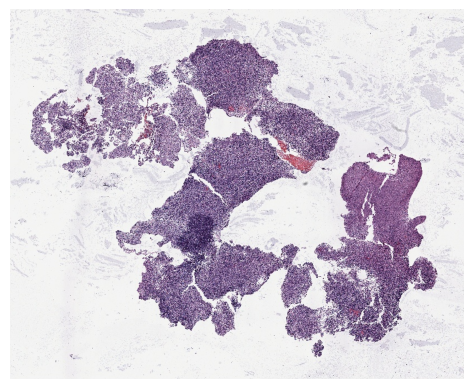

In [42]:
# Display a H&E slide
slide_idx = 85  # pick a H&E slide to display

slide = tiffslide.TiffSlide(he.path.values[slide_idx])

# Display the slide
slide_img = slide.get_thumbnail(slide.level_dimensions[-2])
fig, ax = plt.subplots()
ax.imshow(slide_img)
ax.set_axis_off()
plt.show()

In [26]:
# Load the H1 Bioptimus features paths for each subject
h1 = source_dict_mosaic["he"]["H1 features"]
h1.head(2)

,path,patient id
Subject Id,,
HK_G_001a,/home/ec2-user/SageMaker/data/h1_bioptimus_fea...,HK_G_001
HK_G_002a,/home/ec2-user/SageMaker/data/h1_bioptimus_fea...,HK_G_002


In [27]:
# Load the H1 features for one sample

slide_idx = 12  # pick a H&E slide to display

# Load the H1 zarr object for the selected slide
h1_zarr = zarr.open(h1.path.values[slide_idx], mode='r')

h1_emb = h1_zarr["emb"][:]  # (n tiles, n features) np array H1 features
h1_coords = h1_zarr["coords"][:]  # (n tiles, 2) np array coordinates
h1_level = h1_zarr["level"][:]  # (n tiles, 1) np array level of resolution


## Start exploring the BRUCE Data

In [28]:
# Look at the available data sources
BruceDataset.sources.keys()

dict_keys(['metadata', 'mibi_images'])

In [29]:
# Load the metadata table
source_dict_bruce = BruceDataset.load_tabular()

In [30]:
metadata = source_dict_bruce["metadata"]["metadata"]
metadata.head(2)

,patient_id,fov_immune,fov_tumor,site,who_grade,final_diagnosis,final_diagnosis_simple,who_diagnosis,tumor_region,anatomical_location,...,egfr_egfrvIII_status,row,column,combined_label,TMA_Patient,alignment_status,comp_1,MIBI,MALDI,NS
sample_id,,,,,,,,,,,,,,,,,,,,,
Stanford-100,1777,Stanford_TA552_R1C4,Stanford_TA552_R1C4,Stanford,4,GBM,GBM,4 - GBM,tumor_core_to_infiltrating,CEREBRUM_LEFT_TEMPORAL,...,unk,1,4,R1C4,33707_1,1,other,MIBI,MALDI,NS
Stanford-104,60074,Stanford_TA552_R2C4,Stanford_TA552_R2C4,Stanford,4,GBM,GBM,4 - GBM,tumor_core_to_infiltrating,CEREBRUM_RIGHT_TEMPORAL,...,unk,2,4,R2C4,33708_1,0,other,MIBI,MALDI,NS


### Load a MIBI image

In [31]:
source_dict_bruce.keys()

dict_keys(['metadata', 'mibi_images'])

In [32]:
# Load the information on the image
mibi_immune = source_dict_bruce["mibi_images"]["immune"] # you can also choose "tumor"
mibi_immune.head(2)

,path,marker
sample_id,,
Stanford_TA551_R10C4,/home/ec2-user/SageMaker/data/bruce_dataset/St...,Arginase1
Stanford_TA551_R10C4,/home/ec2-user/SageMaker/data/bruce_dataset/St...,Au


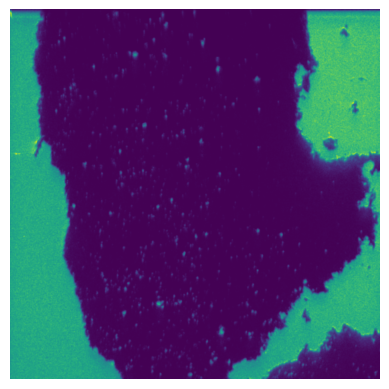

In [33]:
# Display for one sample and one immune marker of interest
img_idx = 1
img = tifffile.imread(mibi_immune.path.values[img_idx])

# Normalize the image to the range [0, 1]
img_normalized = (img - img.min()) / (img.max() - img.min())

# Display the normalized image
plt.imshow(img_normalized)
plt.axis('off')
plt.show()